In [1]:
import json
import os
import pandas as pd

def load_json(filename):
    with open(filename) as f:
        dict_list = [json.loads(line) for line in f]
    return dict_list



In [2]:
import pandas as pd
# from load_json import load_json
import matplotlib.pyplot as plt

result_list = load_json('gen_RF_thesis')
df_result = pd.DataFrame(result_list, columns=list(result_list[0].keys()))
df_result.head()
agg_dict = {key: 'mean' for key in result_list[0].keys()}
del agg_dict['ex_identifier']
del agg_dict['task_num']
del agg_dict['agent_num']
del agg_dict['DSA_converge']
del agg_dict['BnBFMS_converge']


result_agg = df_result.groupby(['task_num'], as_index=False).agg(agg_dict)
show_grouped_result = pd.DataFrame(result_agg)
show_grouped_result

,task_num,BnBFMS_u,BnBFMS_t,BnBFMS_iter,rand,dsa_u,dsa_t,dsa_iter,dsa_msg,LS_u,LS_t,LS_iter,LS_msg_num,LS_converge,disNE_u,disNE_t,disNE_iter,DisNE_msg,DisNE_converge
0,100,7856.87,1.753296,98.98,5019.73,7922.01,0.038201,15.00,1571.16,7640.91,0.017725,5.82,1389.96,True,8133.50,0.016850,5.05,1580.72,True
1,200,16300.60,300.456583,196.46,10102.29,17502.08,0.225980,29.74,10198.88,16814.29,0.071439,8.30,5733.74,True,17881.22,0.058377,6.31,5195.92,True
2,300,15324.75,310.052512,4.00,15228.33,27348.33,1.162731,74.39,48639.00,26080.69,0.176702,10.11,12668.96,True,27890.73,0.128478,6.72,10779.45,True
3,400,20281.15,805.806582,1.00,20245.08,37509.28,16.534995,515.91,557125.44,35397.32,0.375290,10.95,21901.45,True,37944.63,0.237787,6.84,18329.35,True
4,500,NaN,NaN,NaN,25012.43,44048.05,300.074540,4947.24,10393426.14,44614.78,0.544445,11.83,33320.57,True,47959.21,0.375606,7.09,27753.79,True
5,600,NaN,NaN,NaN,30055.53,51823.60,300.106633,2751.47,9999071.31,54040.03,0.814472,12.49,47331.14,True,57993.14,0.545925,7.30,39120.93,True
6,700,NaN,NaN,NaN,35073.35,60098.30,300.150556,1804.01,9466719.89,63423.86,1.187146,13.25,63731.41,True,68035.41,0.776655,7.24,52331.11,True
7,800,NaN,NaN,NaN,40001.24,68237.56,300.217142,1262.11,8860216.14,72772.10,1.623184,13.28,81522.52,True,78079.61,1.058291,7.54,67375.14,True
8,900,NaN,NaN,NaN,45023.85,76532.34,300.292678,924.21,8363995.07,82235.19,2.131933,13.79,102208.72,True,88129.78,1.377194,7.63,84369.87,True
9,1000,NaN,NaN,NaN,49854.74,84917.01,300.334548,705.77,7929024.19,91646.57,2.745681,14.09,125105.42,True,98162.49,1.747135,7.52,102928.25,True


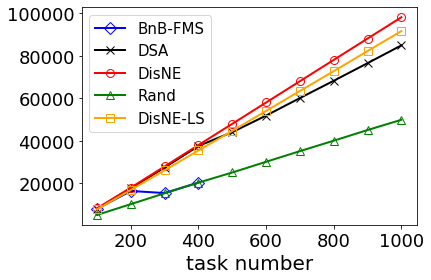

In [3]:
# plt.figure()
x = result_agg['task_num']
y1 = result_agg['BnBFMS_u']
plt.plot(x, y1, 'b-', linewidth=2, color='blue', marker='D', fillstyle='none', markersize=8)
y2 = result_agg['dsa_u']
plt.plot(x, y2, 'b-', linewidth=2, color='black', marker='x', fillstyle='none', markersize=8)
y3 = result_agg['disNE_u']
plt.plot(x, y3, 'b-', linewidth=2, color='red', marker='o', fillstyle='none', markersize=8)
y4 = result_agg['rand']
plt.plot(x, y4, 'b-', linewidth=2, color='green', marker='^', fillstyle='none', markersize=8)
y5 = result_agg['LS_u']
plt.plot(x, y5, 'b-', linewidth=2, color='orange', marker='s', fillstyle='none', markersize=8)
plt.legend(['BnB-FMS', 'DSA', 'DisNE', 'Rand', 'DisNE-LS'], fontsize=15)
# plt.ylabel('utility', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=18)
plt.savefig('utilityRF.pdf',bbox_inches='tight')
# plt.show()
##




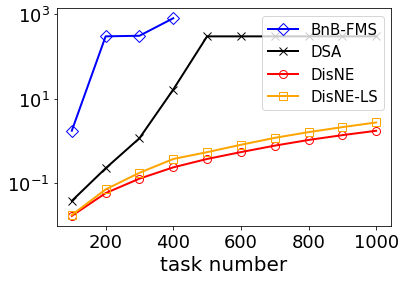

In [4]:
# plt.figure()
x = result_agg['task_num']
y1 = result_agg['BnBFMS_t']
plt.plot(x, y1, 'b-', linewidth=2, color ='blue', marker='D', fillstyle='none', markersize=8)
y2 = result_agg['dsa_t']
plt.plot(x, y2, 'b-', linewidth=2, color ='black', marker='x', fillstyle='none', markersize=8)
y3 = result_agg['disNE_t']
plt.plot(x, y3, 'b-', linewidth=2, color ='red', marker='o', fillstyle='none', markersize=8)
y4 = result_agg['LS_t']
plt.plot(x, y4, 'b-', linewidth=2,color ='orange', marker='s', fillstyle='none', markersize=8)
ax = plt.gca()
ax.set_yscale('log')
plt.legend(['BnB-FMS', 'DSA','DisNE', 'DisNE-LS'], fontsize=15)
# plt.ylabel('time', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=18)
plt.savefig('timeRF.pdf',bbox_inches='tight')
# plt.show()

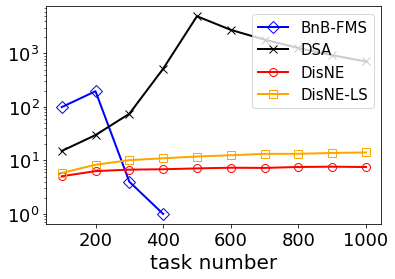

In [5]:
##
# plt.figure()
x = result_agg['task_num']
y1 = result_agg['BnBFMS_iter']
plt.plot(x, y1, 'b-', linewidth=2, color ='blue', marker='D', fillstyle='none', markersize=8)
y2 = result_agg['dsa_iter']
plt.plot(x, y2, 'b-', linewidth=2,color ='black', marker='x', fillstyle='none', markersize=8)
y3 = result_agg['disNE_iter']
plt.plot(x, y3, 'b-', linewidth=2,color ='red', marker='o', fillstyle='none', markersize=8)
y4 = result_agg['LS_iter']
plt.plot(x, y4, 'b-', linewidth=2,color ='orange', marker='s', fillstyle='none', markersize=8)
plt.legend(['BnB-FMS', 'DSA','DisNE', 'DisNE-LS'], fontsize=15)
ax = plt.gca()
ax.set_yscale('log')
# plt.ylabel('iteration', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=18)
plt.savefig('roundRF.pdf',bbox_inches='tight')
# plt.show()

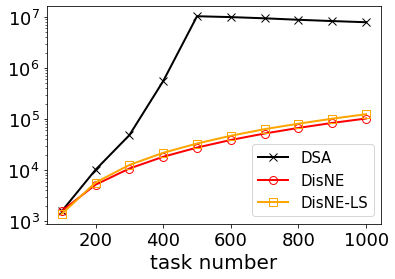

In [6]:
##
# plt.figure()
x = result_agg['task_num']
y1 = result_agg['dsa_msg']
plt.plot(x, y1, 'b-', linewidth=2, color='black', marker='x', fillstyle='none', markersize=8)
y2 = result_agg['DisNE_msg']
plt.plot(x, y2, 'b-', linewidth=2, color='red', marker='o', fillstyle='none', markersize=8)
y3 = result_agg['LS_msg_num']
plt.plot(x, y3, 'b-', linewidth=2,color ='orange', marker='s', fillstyle='none', markersize=8)
plt.legend(['DSA', 'DisNE', 'DisNE-LS'], fontsize=15)
ax = plt.gca()
ax.set_yscale('log')
# plt.ylabel('message passing', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=18)
plt.savefig('msgRF.pdf',bbox_inches='tight')
# plt.show()
